# Best NeighborHood In Pittsburgh

## Introduction

Imagine you are stuck in traffic day after day and then you get home and here about the 5th crime this week in your area you are starting to get worried that the next crime will happen to you. While all of this happens, people are moving out leaving plenty of public housing available. Would you want to like in that neighborhood? Yeah, neither would we. For this project we have decided to determine the best neighborhood in Pittsburgh. For this purpose, we have decided to analyze three different aspects of a neighborhoods: the total crime, the traffic, and the available housing. Our group thinks that these aspects of a Neighborhood can give us an important insight to the "best neighborhood." First let’s start with the neighborhoods with the least crime.

# Crime and Police Activities in Different Neighborhoods

In [50]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt


For this data set the unit used will be called TC for "Total Crime." The less TC a neighborhood has the better the neighborhood is. TC will be calculated from how many crimes occur in certain neighborhoods. For the purposes of finding the best neighborhood the top 5 neighborhoods will be inspected for how many crimes have been committed.

In [51]:
newCrime = pd.read_csv("2016-recent.csv", index_col="PK", low_memory = False)

KeyError: 'PK'

In [76]:
len(newCrime["INCIDENTNEIGHBORHOOD"].unique())

99

In [77]:
newCrime["INCIDENTNEIGHBORHOOD"].unique()

array(['North Shore', 'Upper Lawrenceville', 'Northview Heights',
       'Golden Triangle/Civic Arena', 'South Side Flats', 'Elliott',
       'Homewood North', 'South Side Slopes', 'Carrick', 'South Oakland',
       nan, 'Bloomfield', 'Beechview', 'Bluff', 'Strip District',
       'Mount Washington', 'East Carnegie', 'Crafton Heights',
       'Marshall-Shadeland', 'East Liberty', 'East Allegheny',
       'Friendship', 'Arlington', 'Central Northside',
       'Spring Hill-City View', 'Brighton Heights', 'Westwood',
       'East Hills', 'Brookline', 'South Shore', 'Lower Lawrenceville',
       'Bedford Dwellings', 'Troy Hill-Herrs Island', 'Central Oakland',
       'Garfield', 'West End', 'West Oakland', 'Central Lawrenceville',
       'Lincoln-Lemington-Belmar', 'Sheraden', 'Beltzhoover',
       'Outside City', 'Squirrel Hill South', 'North Oakland',
       'Allentown', 'Perry North', 'Homewood South', 'Shadyside',
       'Manchester', 'Squirrel Hill North', 'Regent Square',
       'Hom

In [78]:
crimeCounts = newCrime['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)
focusedCrime = crimeCounts.head(12)
crimeCounts.head(12)

Mt. Oliver Boro             39
Outside County              91
Outside State              106
Chartiers City             116
Mt. Oliver Neighborhood    117
New Homestead              148
Ridgemont                  170
Swisshelm Park             186
Mount Oliver               191
Arlington Heights          218
East Carnegie              226
Summer Hill                231
Name: INCIDENTNEIGHBORHOOD, dtype: int64

The top 10 contenders are show here because Outside County, Outside State, and Swisshelm Park are not actually neighborhoods, so it is redundant for our purposes. This means out of the 99 neighborhoods within this Pittsburgh dataset the ones with the least crimes are Mt. Oliver Boro, Mt. Oliver Neighborhood, Chartiers City, Swisshelm, Ridgemont, New Homestead, East Carnegie, Arlington Heights, Mount Olver, and Summer Hill. The next graphs plot a helpful graph to visualize the TC of each neighborhood.

Text(0.5, 1.0, 'Total Number of Crimes From 2016-Present')

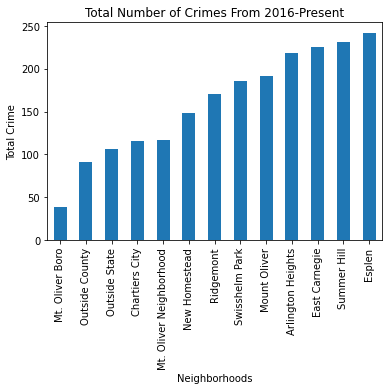

In [79]:
g1 = crimeCounts.head(13).plot(kind = "bar")
plt.xticks(rotation=90, horizontalalignment = "center")
plt.xlabel("Neighborhoods")
plt.ylabel("Total Crime")
plt.title("Total Number of Crimes From 2016-Present")

Text(0.5, 1.0, 'Total Number of Crimes from 2016 - Present')

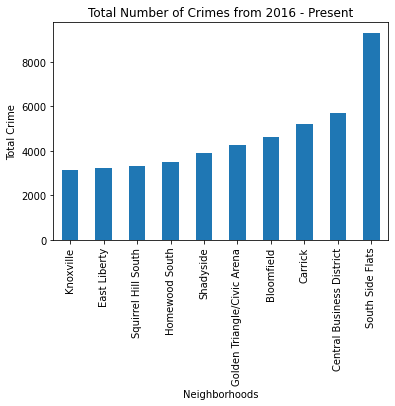

In [80]:
crimeCounts.tail(10).plot(kind = "bar")
plt.xticks(rotation=90, horizontalalignment = "center")
plt.xlabel("Neighborhoods")
plt.ylabel("Total Crime")
plt.title("Total Number of Crimes from 2016 - Present")

These graphs represent the more recent crimes in the neighborhoods of Pittsburgh. It also shows the most crime ridden neighborhoods so that one can see the difference between the most versus the least. These 10 neighborhoods will shortly be multiplied by 2 other units and be converted into the "black cats" or BC. The lower the BC the better the neighborhood.

From these graphs you can see that the difference in the numbers of crimes is astronomical. When considering the best neighborhood, I would want to live in one with as little crime as possible. There is a potential downside to this data set though. The data set does not account for population or the severity of the crime which could change people's answer on the best neighborhood. So this data set counts total crime rather than crime rate so this is one potentional downside. 

For my conclusion it would be that Mt. Oliver Boro is the best Neighborhood because it has the lowest TC. However, the crime level is not the only thing that determines whether a neighborhood is good or not, there are also other factors. In this case Mt. Oliver Boro is the winner.

## Average Traffic in Neighborhoods

In this dataset, we are looking at the total amount of average total daily car traffic is present in each neighborhood from various sources. The neighborhood with the least car traffic will be considered the best neighborhood.

In [4]:
df = pd.read_csv("carz.csv")

<ipython-input-5-20841c67ad4f>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  beforefiltercars = df.groupby("neighborhood").sum()['average_daily_car_traffic'].replace(0, pd.np.nan).dropna()


Text(0, 0.5, 'Average cars per day')

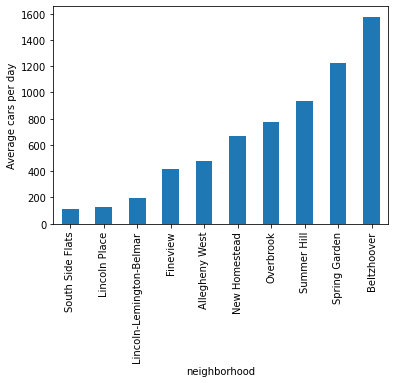

In [5]:
beforefiltercars = df.groupby("neighborhood").sum()['average_daily_car_traffic'].replace(0, pd.np.nan).dropna()
beforefiltercars.sort_values(ascending=True).head(10).plot(kind = "bar")
plt.ylabel("Average cars per day")

This is a bar graph of the top ten contenders for best neighborhood based on traffic counts.

Text(0, 0.5, 'Average cars per day')

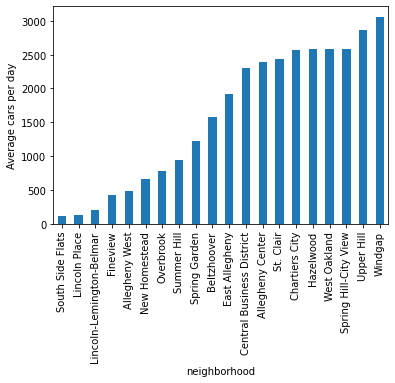

In [15]:
beforefiltercars.sort_values(ascending=True).head(20).plot(kind = "bar")
plt.ylabel("Average cars per day")

In [7]:
num_cars = df.groupby("neighborhood").sum()['average_daily_car_traffic'].replace(0, pd.np.nan).dropna()
num_cars.sort_values(ascending=True).head(10)

<ipython-input-7-e2924cbf9d14>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  num_cars = df.groupby("neighborhood").sum()['average_daily_car_traffic'].replace(0, pd.np.nan).dropna()


neighborhood
South Side Flats             115.0
Lincoln Place                126.0
Lincoln-Lemington-Belmar     195.0
Fineview                     419.0
Allegheny West               477.0
New Homestead                666.0
Overbrook                    777.0
Summer Hill                  937.0
Spring Garden               1226.0
Beltzhoover                 1577.0
Name: average_daily_car_traffic, dtype: float64

These ten neighborhoods have the least average daily car traffic after filtering out neighborhoods with zero average daily car traffic.

This brings me to one of the limitations of my dataset. The DOMI, or the Department of Mobility and Infrastructure counted the traffic based on traffic studies, some based on whether or not to install speed bumps. Because of this, the counters were not necessarily installed in all neighborhoods and were placed at select intersections and streets.

The absence of data for some neighborhoods means counters were only placed in certain locations, so this may not be entirely indicative of the traffic in a neighborhood.

As you can see in this bar graph of the first twenty neighborhoods sorted in ascending order, there are a few neighborhoods with low traffic but the amount of traffic starts to rapidly rise until around 2500. About half of the neighborhoods plotted here have around 2500 cars per day.

From my data, I would conclude the best neighborhood is South Side Flats. It has the lowest average amount of cars per day compared to the other neighborhoods. Coming in close is Lincoln Place, which has a very similar amount of cars per day at 126.

## Jerry's Data

## Combined Data

This is code for when we eventually combine the notebooks. I am getting the crime from the top 10 lowest traffic areas that leo looked at here so we can combine the metrics into black cats.

## CT of Leo's Top 10

I pulled leo's top ten neighborhoods and got there TC value.

In [49]:
South_Side_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['South Side Flats']
print(South_Side_TC)

Lincoln_Place_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Lincoln Place']
print(Lincoln_Place_TC)

Lincoln_Belmar_TC= newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Lincoln-Lemington-Belmar']
print(Lincoln_Belmar_TC)

Fineview_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Fineview']
print(Fineview_TC)

Allegheny_West_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Allegheny West']
print(Allegheny_West_TC)

New_Homestead_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['New Homestead']
print(New_Homestead_TC)

Overbrook_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Overbrook']
print(Overbrook_TC)

Summer_Hill_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Summer Hill']
print(Summer_Hill_TC)

Spring_Garden_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Spring Garden']
print(Spring_Garden_TC)

Beltzhoover_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Beltzhoover']
print(Beltzhoover_TC)

NameError: name 'newCrime' is not defined

## CT of Jerry's Top 10

I pulled Jerry's top neigborhoods and I got there TC as well. 

In [93]:
Squirrel_Hill_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Squirrel Hill North'] + newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Squirrel Hill South']
print(Squirrel_Hill_TC)

# Aspinwall is not in my data set

# Found South Side Flats in Leo's pull

Perry_County_TC  = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Perry North'] + newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Perry South']
print(Perry_County_TC)

Lawrenceville_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Upper Lawrenceville']  = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Lower Lawrenceville'] + newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Central Lawrenceville']
print(Lawrenceville_TC)

#Shaler also is not in this data set

Chateau_TC  = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Chateau']
print(Chateau_TC)

Shadyside_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Shadyside']
print(Shadyside_TC)

Sheraden_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Sheraden']
print(Sheraden_TC)

Highland_Park_TC = newCrime.INCIDENTNEIGHBORHOOD.value_counts()['Highland Park']
print(Highland_Park_TC)

5261
3138
3457
972
3920
2131
2200


## Traffic Of Drake's Top 10

I pulled Drake's top 10 neighborhoods and looked up the average daily traffic of each neighborhood.

In [41]:
#Mt. Oliver Boro was not present in this dataset.
#Mt. Oliver Neighborhood was not present in this dataset.
Chartiers_City_T = num_cars.get(key = 'Chartiers City')
print(Chartiers_City_T)

#Swisshelm Park had no value recorded and thus will not be considered

#Ridgemont Park was not present in this dataset.
New_Homestead_T = num_cars.get(key = 'New Homestead')
print(New_Homestead_T)
#East Carnegie was not present in this dataset.
#Arlington Heights was not present in this dataset.
#Mount Oliver was not present in this dataset.
Summer_Hill_T = num_cars.get(key = 'Summer Hill')
print(Summer_Hill_T)

2571.0
666.0
937.0


## Traffic of Jerry's Top 10

In [40]:
Squirrel_Hill_TC1 = num_cars.get(key = 'Squirrel Hill South')
Squirrel_Hill_TC2 = num_cars.get(key = 'Squirrel Hill North')
Squirrel_Hill_T = Squirrel_Hill_TC1 + Squirrel_Hill_TC2
print(Squirrel_Hill_T)

#Aspinwall was not present in this dataset.
SouthSide_Flats_T =  num_cars.get(key = 'South Side Flats')
print(SouthSide_Flats_T)

Perry_TC1 = num_cars.get(key = 'Perry North')
Perry_TC2 = num_cars.get(key = 'Perry South')
Perry_County_T = Perry_TC1 + Perry_TC2
print(Perry_County_T)

Law1 = num_cars.get(key = 'Lower Lawrenceville')
Law2 = num_cars.get(key = 'Central Lawrenceville')
Lawrenceville_T = Law1 + Law2
print(Lawrenceville_T)

#Shaler Twp was not present in this dataset

#Chateau had no values recorded and will not be considered in this project

Shadyside_T = num_cars.get(key = 'Shadyside')
print(Shadyside_T)

#Sheridan was not present in this dataset

Highland_Park_T = num_cars.get(key = 'Highland Park')
print(Highland_Park_T)

114754.0
115.0
31189.0
16971.0
66132.0
23471.0


## Housing of Drake's Top 10

In [96]:
##Jerry you can put your code here (I already di this for yours you can look at my example above if you need)

## Housing of Leo's Top 10

In [97]:
## Jerry you can put your other code required for this here

## Final Conversion into Black Cats

In this section we will convert all of our units into one single unit called black cats or BC to determine the best neighborhood. The idea of this metric is that black cats mean bad luck so the less of them you see the better out you are. Therfore, the neighborhood with the least amount of BC will be the best.

## Leo's Top 10

This is the conversion to black cats of Leo's top 10. (We still need the housing values so multiply by the open houisng)

In [48]:
SouthSide_Flats_BC = 115.0 * South_Side_TC
Lincoln_Place_BC =   126.0 * Lincoln_Place_TC
Lincoln_Lemington_Belmar_BC = 195.0 * Lincoln_Belmar_TC
Fineview_BC = 419.0 * Fineview_TC
Allegheny_West_BC = 477.0 * Allegheny_West_TC
New_Homestead_BC = 666.0 * New_Homestead_TC
Overbrook_BC = 777.0 * Overbrook_TC
Summer_Hill_BC = 937.0 * Summer_Hill_TC
Spring_Garden_BC = 1226.0 * Spring_Garden_TC
Beltzhoover_BC = 1577.0 * Beltzhoover_TC
print(SouthSide_Flats_BC, Lincoln_Place_BC, Lincoln_Lemington_Belmar_BC, Fineview_BC, Allegheny_West_BC, 
      New_Homestead_BC, Overbrook_BC, Summer_Hill_BC, Spring_Garden_BC, Beltzhoover_BC)

NameError: name 'South_Side_TC' is not defined

## Drake's Top 10 conversion

We need traffic and housing for my top 10 (there is only 8 bc leo already has some of the same neigborhoods) We need leo's traffic and Jerry's Housing inputs on these.

In [47]:
# Oliver Boro cannot be converted -leo-
Chartiers_City_BC = 116 * Chartiers_City_T
# Oliver Neighborhood cannot be converted -leo-
Ridgemont_BC = 170 * Ridgemont_T
# Swisshelm Park cannot be converted -leo-
# Mount Oliver cannot be converted -leo-
# Arlington Heights cannot be converted  -leo-
# East Carnegie cannot be converted -leo-


NameError: name 'Ridgemont_T' is not defined

## Jerry's Top 10 conversion

This is the final dictionary showing the top rated neighborhoods in the black cats value. Leo we need the traffic values for these neighborhoods.

In [46]:
Squirrel_Hill_BC = 1 * Squirrel_Hill_T * Squirrel_Hill_TC
# Aspinwall Cannot be converted
Perry_County_BC = 1 * Perry_County_T * Perry_County_TC
Lawrenceville_BC = 1 * Lawrenceville_T * Lawrenceville_TC
# Shaler_Twp cannor be converted
# Chateau cannot be converted
Shadyside_BC = 1 * Shadyside_T * Shadyside_TC
# Sheridan cannot be converted 
Highland_Park_BC = 1 * Highland_Park_T * Highland_Park_TC
SouthSide_Flats_BC = 1 * SouthSide_Flats_T * SouthSide_Flats_TC
print(Squirrel_Hill_BC,Perry_County_BC,Lawrenceville_BC,Shadyside_BC,Highland_Park_BC,SouthSide_Flats_BC)

13168480516.0 972753721.0 288014841.0 4373441424.0 550887841.0 13225.0


# Final Dictionary of The top Black Cat Values

# Top 25 Neighborhoods

Values are skewed right now because not all of the data is in.

In [101]:
black_cats_dict = {"South Side Flats": SouthSide_Flats_BC,
                   "Lincoln Place": Lincoln_Place_BC,
                   "Lincoln Lemington Belmar": Lincoln_Lemington_Belmar_BC,
                   "Fineview": Fineview_BC,
                   "Allegheny West": Allegheny_West_BC,
                   "New Homstead" : New_Homestead_BC,
                   "Overbrook" : Overbrook_BC,
                   "Summer Hill": Summer_Hill_BC,
                   "Spring Garden" : Spring_Garden_BC,
                   "Beltzhoover" : Beltzhoover_BC,
                   "Squirrel_Hill" : Squirrel_Hill_BC,
                   "Perry County" : Perry_County_BC,
                   "Lawrenceville" : Lawrenceville_BC,
                   "Chateau" : Chateau_BC,
                   "Shadyside" : Shadyside_BC,
                   "Sheridan" : Sheridan_BC,
                   "Highland_Park" : Highland_Park_BC,
                   "Olver Boro" : Oliver_Boro_BC,
                   "Chartiers City" : Chartiers_City_BC,
                   "Oliver Neighborhood" : Oliver_Neighborhood_BC,
                   "Ridgemonet" : Ridgemont_BC,
                   "Swisshelm Park" : Swisshelm_Park_BC,
                   "Mount Olver" : Mount_Oliver_BC,
                   "Arlington" : Arlington_Heights_BC,
                   "East Carnegie" :East_Carnegie_BC,
                  }

black_cats = pd.Series(black_cats_dict).sort_values(ascending=True)

black_cats

Olver Boro                       39.0
Chartiers City                  116.0
Oliver Neighborhood             117.0
Ridgemonet                      170.0
Swisshelm Park                  186.0
Mount Olver                     191.0
Arlington                       218.0
East Carnegie                   226.0
Chateau                         972.0
Sheridan                       2131.0
Highland_Park                  2200.0
Perry County                   3138.0
Lawrenceville                  3457.0
Shadyside                      3920.0
Squirrel_Hill                  5261.0
Lincoln Place                 92232.0
New Homstead                  98568.0
Summer Hill                  216447.0
Fineview                     310479.0
Allegheny West               317682.0
Spring Garden                495304.0
Lincoln Lemington Belmar     611325.0
Overbrook                    641802.0
South Side Flats            1069730.0
Beltzhoover                 1261600.0
dtype: float64

Olver Boro              39.0
Chartiers City         116.0
Oliver Neighborhood    117.0
Ridgemonet             170.0
Swisshelm Park         186.0
dtype: float64


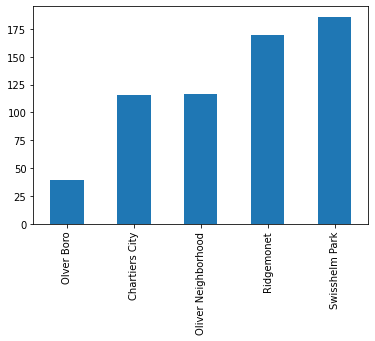

In [102]:
graph = pd.Series(black_cats)
final = graph.head(5)
print(final)
final.plot(kind = "bar")

# Final Conclusions

Drake's Conclusion - We need to wait until all data it input to make a conclusion

Leo's Conclusion - 

Jerry's Conclusion -